# Analysis of Police Kills Given Different Variables
### James Reed
### Big Data

### Introduction 

In this project, we analyzed variables surrounding Police killing citizens. Movements such as Black Lives Matter have shed light on the high probability of African Americans being wrongly prosecuted and killed by police. There is an argument claiming that a disproportionate number of African Americans are killed by police than any other race. In this project, we examained the correlation between factors such as crime rate and number of citizens that the police kill, the correlation between the percentage of black people and crime rate and the correlation between an increase in percentage of black residence and police kills. I also found the states in which it is most likley for someone of any race to be killed by police and the state in which it is most likley for an African American to be killed in. Finally, as an extention, I analyzed how age and gender can also play a role in police shootings. 

## Part One: Correlation Between Black Population Percent and Citizens Killed and Crime Rate and Citizens Killed

Correlation between crime rate and police kills: LinregressResult(slope=0.34186205691569327, intercept=9.6340608437767976, rvalue=0.10475329218455255, pvalue=0.29963347888839847, stderr=0.32784925505368107)


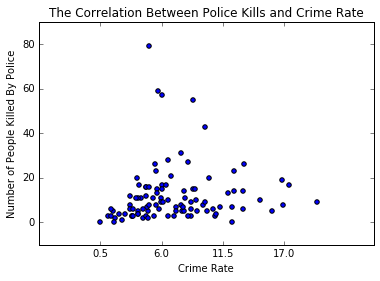

Correlation Between Crime Rate and Percent of Blacks in Area: LinregressResult(slope=3.2807786662545606, intercept=-2.5868628344209768, rvalue=0.71737600916871047, pvalue=4.60376350679606e-17, stderr=0.32185054869630292)


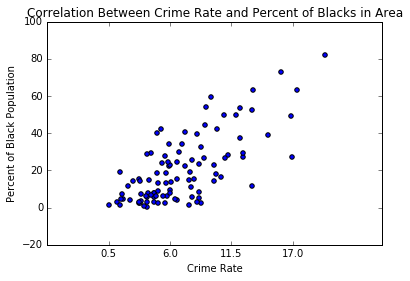

Correlation Between Percent of Black People and Black People Killed By Police: LinregressResult(slope=-0.0042826914371165929, intercept=12.138216591298303, rvalue=-0.006001553033238384, pvalue=0.95274381647911521, stderr=0.072082904486012594)


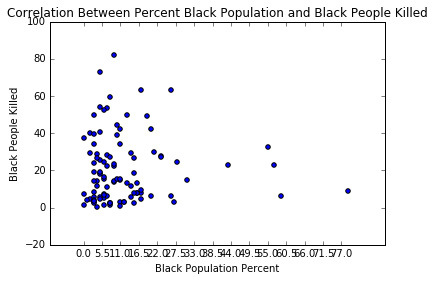

In [26]:
import statistics
import scipy.stats as st 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data_one = open("Part_One_Data.csv", "r", errors = "ignore"); 
data_list = []; 
for bb in data_one:
    data_list.append(bb); 
del data_list[0];

for ii in range(len(data_list)):
    #make into a list of lists of just numbers
    data_list[ii] = data_list[ii].split(",");

cities = [];
for ii in range(len(data_list)):
    cities.append(data_list[ii][1]); 
    
crime_rate = []; 
for aa in range(len(data_list)):
    crime_rate.append(data_list[aa][0]);
#print(crime_rate)

for xx in range(len(crime_rate)):
    crime_rate[xx] = float(crime_rate[xx])

max_crime = crime_rate.index(max(crime_rate)); 

killed_by_police = []; 
for bb in range(len(data_list)):
    killed_by_police.append(data_list[bb][2]); 
#print(killed_by_police); 

for yy in range(len(killed_by_police)):
    killed_by_police[yy] = float(killed_by_police[yy]); 

#print(data_list[1][max_crime]);

#slope, intercept, rvalue, pvalue, stderr = st.linregress(crime_rate, killed_by_police);
linplot = st.linregress(crime_rate, killed_by_police); 
print("Correlation between crime rate and police kills:", linplot);

bestfit = (linplot[0] + linplot[1]); 
plt.scatter(crime_rate, killed_by_police,);
plt.xticks(np.arange(min(crime_rate), max(crime_rate), 5.5));
plt.title("The Correlation Between Police Kills and Crime Rate")
plt.xlabel("Crime Rate")
plt.ylabel("Number of People Killed By Police"); 

#plt.plot(bestfit);
plt.show();

data_two = open("Part_One_Two_Data.csv", "r", errors = "ignore"); 
data_list_two = []; 
for rr in data_two:
    data_list_two.append(rr); 
del data_list_two[0];

for zz in range(len(data_list_two)):
    #make into a list of lists of just numbers
    data_list_two[zz] = data_list_two[zz].split(",");
#print(data_list_two);

Blackper = []; 
for kk in range(len(data_list_two)):
    Blackper.append(data_list_two[kk][2]);
#print(Blackper)

for xx in range(len(Blackper)):
    Blackper[xx] = float(Blackper[xx])

linplot_two = st.linregress(crime_rate, Blackper); 
print("Correlation Between Crime Rate and Percent of Blacks in Area:", linplot_two);
plt.scatter(crime_rate, Blackper,);
plt.xticks(np.arange(min(crime_rate), max(crime_rate), 5.5));
plt.title("Correlation Between Crime Rate and Percent of Blacks in Area")
plt.xlabel("Crime Rate")
plt.ylabel("Percent of Black Population")
#plt.plot(bestfit);
plt.show();

linplot_three = st.linregress(killed_by_police, Blackper); 
print("Correlation Between Percent of Black People and Black People Killed By Police:", linplot_three);
plt.scatter(killed_by_police, Blackper,);
plt.xticks(np.arange(min(killed_by_police), max(killed_by_police), 5.5));
plt.title("Correlation Between Percent Black Population and Black People Killed")
plt.xlabel("Black Population Percent")
plt.ylabel("Black People Killed")
#plt.plot(bestfit);
plt.show();

The above data is a visualization and an analysis of correlation between various location given crime rate and police kills, a given black population and crime rate and a correlation of locations given black population percentage and police kills. As can be noted above, There is not a high correlation between a high crime rate and police killing people in a given location. We can conclude this becasue our rvalue is very low (at .104). A low r value lets us know that are data does not follow a linear pattern, letting us know that there is no constant correlation between the violent crime rate of a city and the police killing people of the same location. On the other hand, there seems to be a much higher r-value or correlation between a larger black community and crime rate. This is MOST LIKLEY A BIASED CORRELATION. Due to current issues of rasism and profiling, police are probably more likley to arrest a black person for commiting a crime before they arrest another person of a different ethnicity for commiting the same crime. The final graph yeilded confusing results. Even with a higher black prcentage community, there is na very low correlation between the two. Given the results of the previous graph, I find this result somewhat suspicious. In conclusion to part one, there seems to be no correlation between a crime rate and citizens shot by police and no correlation between a higher black population and police shooting citizens. 

## Part Two: Locations With The Most Police Shootings

In [44]:
import statistics
import scipy.stats as st 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data_two = open("Part_Two_Data.csv", "r", errors = "ignore"); 
data_list = []; 
for bb in data_two:
    data_list.append(bb); 
del data_list[0];

for ii in range(len(data_list)):
    #make into a list of lists of just numbers
    data_list[ii] = data_list[ii].split(",");

for aa in range(len(data_list)):
    if data_list[aa][1] == 'PN':
        data_list[aa][1] = 'PA'
di = {}
for ii in data_list:
    if ii[1] not in di:
        di[ii[1]] = 1
    else:
        di[ii[1]] += 1

test = sorted(di.items(), key=lambda x:x[1]);

city_list = []; 
for cc in range (len(test)):
    city_list.append(test[cc][0]); 
    
city_death_list = []; 
for dd in range(len(test)):
    city_death_list.append(test[dd][1]); 

#print(city_death_list);
#print(city_list); 

city = city_death_list.index(max(city_death_list));
print("The State where the most deaths occured was", city_list[city] + ".");

black_death_state = [] 
for ee in range(len(data_list)):
    if data_list[ee][0] == "Black":
        black_death_state.append(data_list[ee][1])

di_two = {}
for ii in black_death_state:
    if ii not in di_two:
        di_two[ii] = 1
    else:
        di_two[ii] += 1

test_two = sorted(di_two.items(), key=lambda x:x[1]);

city_list_two = []; 
for ff in range (len(test_two)):
    city_list_two.append(test_two[ff][0]); 
    
city_death_list_two = []; 
for jj in range(len(test_two)):
    city_death_list_two.append(test_two[jj][1]); 

city_two = city_death_list_two.index(max(city_death_list_two));
print("The Sate where it is most likley for an african american to be killed is", city_list_two[city_two] + ".");



    


The State where the most deaths occured was CA.
The Sate where it is most likley for an african american to be killed is FL.


The State where the most deaths of all races occured in California. California's victim death rate was much higher than all of the other states. While this is problamatic, there results make sence due to California's large population size. Because of the fact that California has the highest state population in the United States, it makes sense that the most deaths would occur in California. The state where it is most likley for an african american to be killed by a police officer is Florida. This also makes sense given Florida's large population size. After more research, I concluded that Florida also has a higher African American population than the average US state. This indicates that there is a correlation between increase in black residence percentage and blacks killed in the area by police. 

## Part Three : Which gender is most likley to be killed by the police? Which age group has the most deaths? 

In [73]:
data_three = open("Part_Three_Data.csv", "r", errors = "ignore"); 

data_list = []; 
for aa in data_three:
    data_list.append(aa); 
del data_list[0];

for ii in range(len(data_list)):
    #make into a list of lists of just numbers
    data_list[ii] = data_list[ii].split(",");

for xx in range (len(data_list)):
    data_list[xx][1] = data_list[xx][1].replace("\n", "");
#for mm in range(len(data_list)):
    #if data_list[mm][1] == 'Unknown':
        #data_list[mm][1] = '40'
        
di_two = {}
for cc in data_list:
    if cc[1] not in di_two:
        di_two[cc[1]] = 1
    else:
        di_two[cc[1]] += 1
#print(di_two);
test = sorted(di_two.items(), key=lambda x:x[1]);
print(test);

di = {}
for ii in data_list:
    if ii[0] not in di:
        di[ii[0]] = 1
    else:
        di[ii[0]] += 1
print(di);



[('107', 1), ('89', 1), ('7', 1), ('88', 1), ('6', 1), ('97', 1), ('82', 1), ('95', 1), ('101', 1), ('93', 1), ('12', 2), ('1', 2), ('10', 2), ('87', 2), ('79', 3), ('83', 3), ('80', 3), ('5', 3), ('77', 3), ('84', 3), ('13', 3), ('74', 4), ('75', 4), ('86', 4), ('14', 5), ('78', 5), ('73', 6), ('76', 6), ('71', 7), ('70', 8), ('15', 9), ('65', 10), ('72', 10), ('', 11), ('67', 12), ('69', 12), ('66', 13), ('68', 14), ('64', 20), ('62', 20), ('63', 23), ('61', 27), ('60', 28), ('56', 31), ('16', 32), ('58', 35), ('17', 41), ('57', 42), ('59', 44), ('55', 50), ('54', 50), ('48', 52), ('53', 56), ('Unknown', 60), ('46', 61), ('52', 63), ('51', 70), ('47', 71), ('42', 75), ('41', 78), ('43', 79), ('19', 79), ('44', 79), ('49', 80), ('50', 81), ('18', 82), ('39', 84), ('45', 87), ('20', 95), ('40', 96), ('36', 104), ('38', 109), ('37', 109), ('32', 112), ('21', 113), ('23', 120), ('34', 123), ('33', 124), ('35', 127), ('22', 130), ('24', 130), ('28', 138), ('27', 138), ('29', 138), ('30', 

After my part three analysis, I found that the most deaths definently seem to happen between the ages of 20 - 40. The highest being 26 years old at 140 total deaths. I found that Males have a much higher chance of being killed by police than females and other genders. Based on this image along with the previous section of the analysis, it can be resonably infered that the most commonly killed person is a 26 year old african american male. This figure could be seen as the most "threatening" figure to police. Police are most likley to identify a 26 year old male as the largest threat. Within this group and due to racial profiling, African males of this age are at a much higher risk of being shot by the police. 

Conclusion: 
After my research, I found that there does infact seem to be a larger number of African Americans who are killed by the police. After more research I found that males who are aged 20 - 40 are also targeted highly by the police. Again, this could be because this age group is seen as the most "physically able and threatening group." It would also be interesting to do tests comparing how often different races are cited for small misdemenors (ie being pulled over while driving, being accused of shoplifting etc.) This could add insight to the fairness of the legal system.  